# Analiza i priprema podataka

Pre svega,neophodno je instalrati TensorFlow sledećom komandom

In [ ]:
!pip install tensorflow

Sledi importovanje potrebnih biblioteka, među kojima su pandas, numpy, seborn itd.

In [ ]:
import tensorflow as tf
from google.colab import files
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


Sledeći deo koda vrši učitavanje csv fajla koji sadrži skup podataka za rad.

In [ ]:

file=files.upload()
dataset=pd.read_csv("winequalityN.csv")

Saving winequalityN.csv to winequalityN (1).csv


Učitane podatke kopiramo u fajl pod nazivom data. Funkcija tail() prikazuje poslednjih 5 vrsta u skupu podataka.

In [ ]:
data=dataset.copy()
data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Ispitati da li skup podataka sadrži nedostajuće vrednosti. Ukoliko postoje, obrisati ih. Ovde se nećemo baviti detaljnom analizom i obradom nedostajućih vrednosti. Jedan od načina za sređivanje nedostajućih vrednosti je i popunjavanje određenim vrednostima kao što su mean, median ako su podaci numeričkog tipa. U ovom primeru ćemo ih samo obrisati.

In [ ]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Vidimo da skup sadrži nedostajuće vrednosti. Sledi brisanje narednom komandom.

In [ ]:
data=data.dropna()

Analizirajmo malo naš skup podataka. Funkcija describe() daje neke informacije u kolonama, kao što su srednja vrednost, standardno odstupanje, minimum,maksimum itd.

In [ ]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Pozivajući funkciju info() možemo saznati nešto više o našim podacima. Jedan bitan podatak je i tip svakog atributa koji je označen kolonom Dtype.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


Ukoliko pozovemo data.shape dobićemo iz koliko vrsta i kolona se sastoji naš skup podataka

In [ ]:
data.shape

(6463, 13)

Sada ćemo napraviti kopiju naše skupa podataka i smestiti u novu promenljivu. Pozivom funkcije info(), videli smo da je kolona type kategorijskoh tipa, što nije pogodno za funkcije predikcije. Zato ćemo izvršiti One-hot-encodings (enkodiranje) nad tom kolonom, funkcijom pd.get.dummies(). Argumenti koji joj je šalju su, respektivno, skup podataka, kolona nad kojom se vrši enodiranje i prefiks koji će sadržati novoformirane kolone u svom nazivu.
Zatim pozivom data1.head dobijamo prvih 5 vrsta našeg novog skupa.

In [ ]:
data1=data.copy()
data1=pd.get_dummies(data1, columns=['type'],prefix=['type'])
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


Ukoliko malo bolje pogledamo kolonu '**quality**' primetićemo da se vrednosti kreću od 3 do 9.

In [ ]:
data1['quality'].value_counts().sort_index()

3      30
4     214
5    2128
6    2820
7    1074
8     192
9       5
Name: quality, dtype: int64

Hajde da ove vrednosti klasifikujemo u binarnu promenljivu dodajući novu kolonu pod nazivom "is_good_wine". Ukoliko je vrednost "quality" veća od 6, ovaj atribut će imati vrednst 1, a ukoliko je manja 0.

In [ ]:
data1['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in data1['quality']
]
data1.drop('quality', axis=1, inplace=True)
data1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1,1


Izvršavanjem sledećeg koda vidimo da imamo 4091 vrstu vina koja se klasifikuju kao dobra, a 2372 kao loša.

In [ ]:
data1['is_good_wine'].value_counts()

1    4091
0    2372
Name: is_good_wine, dtype: int64

# Podela na train i test skup

Model koji pravimo će prediktovati da li vino pripada grupi dobrih ili loših vina. Dakle, vršiće se binarna klasifikacija.

Podatke ćemo podeliti u razmeri 80:20 na skup za treniranje i testiranje. Model će prediktovati da li vino pripada grupi dobrih ili loših vina.






In [ ]:
from sklearn.model_selection import train_test_split

X = data1.drop('is_good_wine', axis=1)
y = data1['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

Pogledajmo, trening skup obuhvata 5170 vrsta. Ostalih 1293 pripada tesnom skupu.

In [ ]:
X_train.shape


(5170, 13)

## Skaliranje podataka

Kolone kao što su sulfati i limunska kiselina imaju vrednosti blizu nule, dok je ukupan sumpor dioksid u stotinama. Neuronska će misliti da je vrednost na višoj skali važnija, zato se vrši skaliranje podataka.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Štampanjem kolone X_train_scaled vidimo da je skaliranje uspešno izvršeno.

In [ ]:
print(X_train_scaled)

[[-0.86265684  0.56588915  0.22079121 ... -1.66472797 -0.57094748
   0.57094748]
 [ 0.99186667 -1.02945526  2.92098728 ...  1.63149383 -0.57094748
   0.57094748]
 [-1.55810316 -0.72265826  0.98238498 ... -0.62233304 -0.57094748
   0.57094748]
 ...
 [ 3.31002106  0.44317035  1.39779975 ...  0.44823472  1.7514746
  -1.7514746 ]
 [ 1.99640024 -0.53858006  1.19009236 ... -0.39695035  1.7514746
  -1.7514746 ]
 [ 1.22368211  0.13637334  0.84391338 ... -0.48146886 -0.57094748
   0.57094748]]


# Obuka klasifikacionog modela pomoću TensorFlow biblioteke

Pre svega, treba importovati potrebne biblioteke.
Naš model će imati 4 sloja neurona, od čega prvi ima 128 neurona, drugi i treći 256 i izlazni sloj ima 1 neuron zato što vršimo binarnu klasifikaciju. (Da li vino pripada dobrim vinima ili ne).

Skriveni slojevi koriste ReLU kao funkciju aktivacije, a izlazni sloj koristi Sigmoid.

In [ ]:
import tensorflow.keras.models
import tensorflow.keras.layers
from keras import regularizers
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))
])



Funkcija gubitka (loss) će biti binary_crossentropy, optimizer adam, a koristićemo metriku accuracy(tačnost).

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)
model.evaluate(X_test,y_test,batch_size=64)

Epoch 1/100
130/130 [==============================] - 1s 6ms/step - loss: 0.8049 - accuracy: 0.7176 - val_loss: 0.6087 - val_accuracy: 0.7389
Epoch 2/100
130/130 [==============================] - 1s 4ms/step - loss: 0.5937 - accuracy: 0.7309 - val_loss: 0.6032 - val_accuracy: 0.7205
Epoch 3/100
130/130 [==============================] - 1s 4ms/step - loss: 0.5836 - accuracy: 0.7357 - val_loss: 0.6100 - val_accuracy: 0.7292
Epoch 4/100
130/130 [==============================] - 1s 4ms/step - loss: 0.5873 - accuracy: 0.7379 - val_loss: 0.5903 - val_accuracy: 0.7418
Epoch 5/100
130/130 [==============================] - 1s 4ms/step - loss: 0.5790 - accuracy: 0.7343 - val_loss: 0.6056 - val_accuracy: 0.7369
Epoch 6/100
130/130 [==============================] - 1s 4ms/step - loss: 0.5794 - accuracy: 0.7384 - val_loss: 0.5888 - val_accuracy: 0.7360
Epoch 7/100
130/130 [==============================] - 1s 4ms/step - loss: 0.5774 - accuracy: 0.7365 - val_loss: 0.6284 - val_accuracy: 0.6789

[1.1012076139450073, 0.42150038480758667]

Pratili smo gubitke i tačnost tokom treninga i sačuvali ih u istoriji. Sada možemo da vizuelizujemo ove metrike da bismo stekli osećaj kako model radi.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

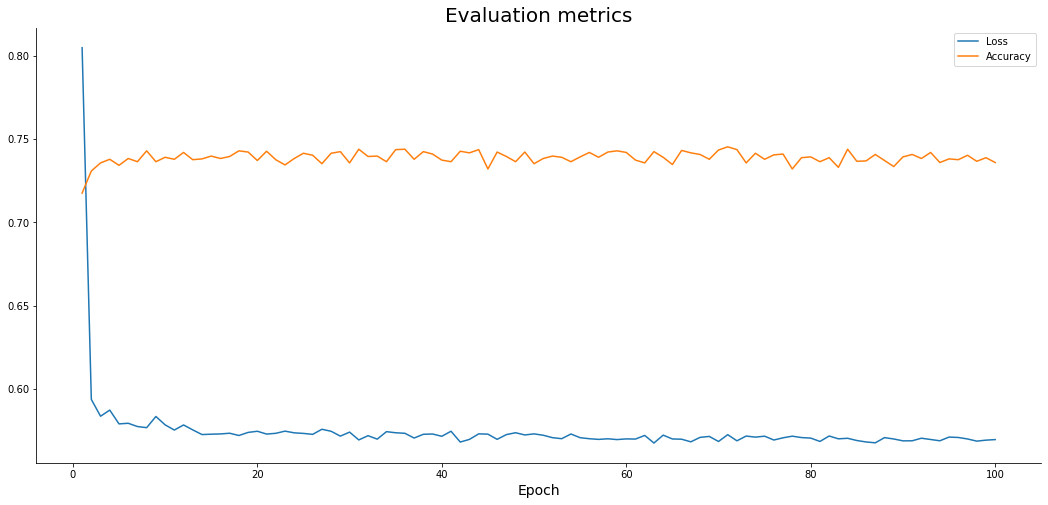

In [ ]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();


Iz priloženog grafika preko nacrtanih krvih vidimo da vrednost funkcije gubitka opada treniranjem modela.

# Formiranje predikcije

Pozivom funkcije predict za obučeni model, dobijamo predikcije.

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
print(predictions)

[[0.65542316]
 [0.5523302 ]
 [0.8906244 ]
 ...
 [0.8596362 ]
 [0.43693036]
 [0.31120896]]


Predikcije ćemo morati da konverujemo u klase, vodeći se sledećom logikom. Ukoliko je vrednost veća od 0.5 konverujemo je u 1, a suprotnom u 0. Funkcija ravel iz biblioteke numpy od višedimenzionalnog niza formira jednodimenzioni niz.

In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

# Ocenjivanje modela na tesnom skupu

Predstaviti matricu konfuzije. Kao argumente joj šaljemo stvarne i prediktovane vrednosti

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[238 244]
 [ 98 713]]


Izračunajmo accuracy, precision i recall metrike.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.74
Precision: 0.75
Recall: 0.88


**Accurac**y(tačnost modela) se definiše kao broj klasifikacija koje model tačno predviđa podeljen sa ukupnim brojem napravljenih predviđanja.

**Precision**(Preciznost)- izračunava se kao odnos između broja pozitivnih uzoraka ispravno klasifikovanih i ukupnog broja uzoraka klasifikovanih kao pozitivni (bilo ispravno ili netačno).

**Recall** izračunava se kao broj istinitih pozitivnih uzoraka podeljen brojem istinito pozitivnih plus brojem lažno negativnih.